Test CAMB

In [34]:
import sys, platform, os
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
#Find local CAMB installation:
_camb_path = os.path.join(os.path.abspath('..'),'CAMB/CAMB')
sys.path.insert(0, _camb_path)
import camb

print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))

Using CAMB 1.5.4 installed at /home/git/AstroCosmoComputational/Students/Gabriele_Russo/CAMB/CAMB/camb


In [35]:
# set up parameters:
# setting up my fiducial cosmology 
pars = camb.set_params(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06,  
                       As=2e-9, ns=0.965, halofit_version='mead', lmax=3000)

# I can change parameters, here changing K
pars1 = camb.set_params(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0.1, tau=0.06,  
                       As=2e-9, ns=0.965, halofit_version='mead', lmax=3000)

In [36]:
# prints all the parameters you can use with this function
pars

class: <CAMBparams>
 WantCls = True
 WantTransfer = False
 WantScalars = True
 WantTensors = False
 WantVectors = False
 WantDerivedParameters = True
 Want_cl_2D_array = True
 Want_CMB = True
 Want_CMB_lensing = True
 DoLensing = True
 NonLinear = NonLinear_none
 Transfer: <TransferParams>
   high_precision = False
   accurate_massive_neutrinos = False
   kmax = 0.9
   k_per_logint = 0
   PK_num_redshifts = 1
   PK_redshifts = [0.0]
 want_zstar = False
 want_zdrag = False
 min_l = 2
 max_l = 3150
 max_l_tensor = 600
 max_eta_k = 7875.0
 max_eta_k_tensor = 1200.0
 ombh2 = 0.022
 omch2 = 0.122
 omk = 0.0
 omnuh2 = 0.000644866570625114
 H0 = 67.5
 TCMB = 2.7255
 YHe = 0.24569492503497048
 num_nu_massless = 2.0293333333333337
 num_nu_massive = 1
 nu_mass_eigenstates = 1
 share_delta_neff = False
 nu_mass_degeneracies = [1.0146666666666666]
 nu_mass_fractions = [1.0]
 nu_mass_numbers = [1]
 InitPower: <InitialPowerLaw>
   tensor_parameterization = tensor_param_rpivot
   ns = 0.965
   nrun =

In [37]:
#calculate results for these parameters
results  = camb.get_results(pars)
results1 = camb.get_results(pars1)

**Background Cosmology:**

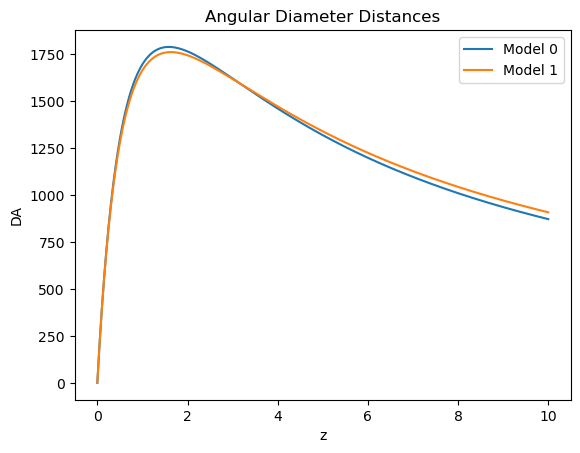

In [38]:
#Distances:
z = np.linspace(0, 10, 1000)
DA = results.angular_diameter_distance(z)
DA1 = results1.angular_diameter_distance(z)
plt.plot(z, DA, label='Model 0')
plt.plot(z, DA1, label='Model 1')
plt.legend()
plt.xlabel('z')
plt.ylabel('DA')
plt.title('Angular Diameter Distances')
plt.show()

In [39]:
# Background Densities:
a = np.logspace(-6, 0, 1000) # grid spaced in log since 
# from a=10^{-8} to 1 (deap rad domination to today)
#remaind a_{mat, rad equality} about 10^{-4}
densities  = results.get_background_densities(a) 
densities1 = results1.get_background_densities(a)

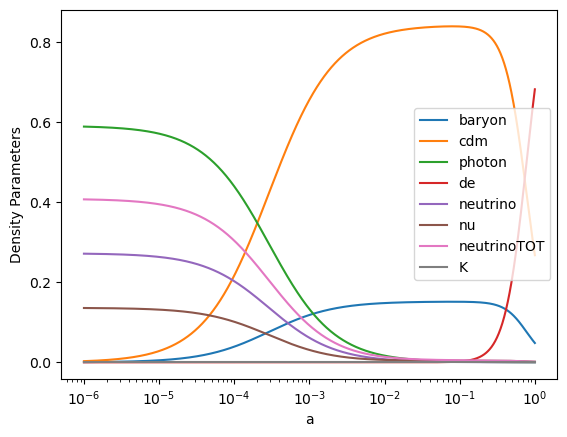

In [40]:
# Plotting relative densities
plt.plot(a, densities['baryon']/densities['tot'], label='baryon')
plt.plot(a, densities['cdm']/densities['tot'], label='cdm')
plt.plot(a, densities['photon']/densities['tot'], label='photon')
plt.plot(a, densities['de']/densities['tot'], label='de')
plt.plot(a, densities['neutrino']/densities['tot'], label='neutrino')
plt.plot(a, densities['nu']/densities['tot'], label='nu')
#plt.plot(a, densities['nu']/densities['tot'], label='nu') sommare neutrino con nu perchè sono varie famiglie di neutrini
plt.plot(a, (densities['neutrino']+densities['nu'])/densities['tot'], label='neutrinoTOT')
plt.plot(a, densities['K']/densities['tot'], label='K') # curvature
plt.legend()
plt.xlabel('a')
plt.ylabel('Density Parameters')
plt.xscale('log')

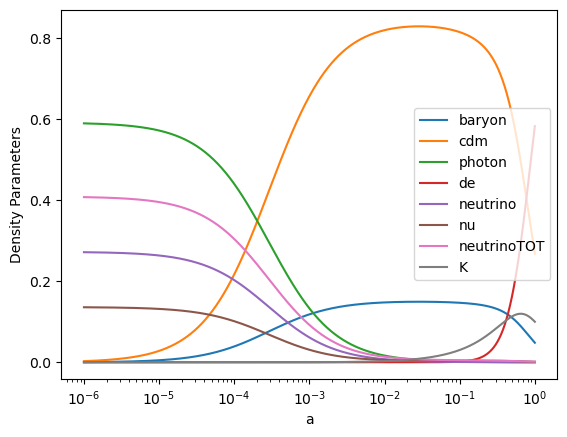

In [41]:
plt.plot(a, densities1['baryon']/densities1['tot'], label='baryon')
plt.plot(a, densities1['cdm']/densities1['tot'], label='cdm')
plt.plot(a, densities1['photon']/densities1['tot'], label='photon')
plt.plot(a, densities1['de']/densities1['tot'], label='de')
plt.plot(a, densities1['neutrino']/densities1['tot'], label='neutrino')
plt.plot(a, densities1['nu']/densities1['tot'], label='nu')
#plt.plot(a, densities1['nu']/densities['tot'], label='nu') sommare neutrino con nu perchè sono varie famiglie di neutrini
plt.plot(a, (densities1['neutrino']+densities1['nu'])/densities1['tot'], label='neutrinoTOT')
plt.plot(a, densities1['K']/densities1['tot'], label='K') #curvature
plt.legend(loc='best')
plt.xlabel('a')
plt.ylabel('Density Parameters')
plt.xscale('log')

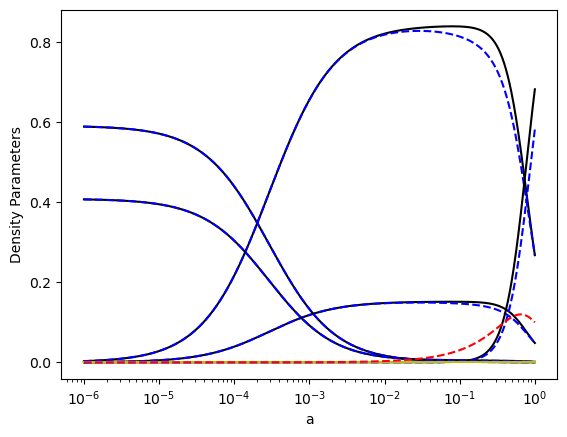

In [42]:
#2 graph comparison (using only total neutrino density)
# Plotting relative densities
plt.plot(a, densities['baryon']/densities['tot'], label='baryon', c='k')
plt.plot(a, densities1['baryon']/densities1['tot'], ls='--', label='baryon1', c='b')
plt.plot(a, densities['cdm']/densities['tot'], label='cdm', c='k')
plt.plot(a, densities1['cdm']/densities1['tot'], ls='--', label='cdm1', c='b')
plt.plot(a, densities['photon']/densities['tot'], label='photon', c='k')
plt.plot(a, densities1['photon']/densities1['tot'], ls='--', label='photons1', c='b')
plt.plot(a, densities['de']/densities['tot'], label='de', c='k')
plt.plot(a, densities1['de']/densities1['tot'], ls='--', label='de1', c='b')
plt.plot(a, (densities['neutrino']+densities['nu'])/densities['tot'], label='neutrinoTOT', c='k')
plt.plot(a, (densities1['neutrino']+densities1['nu'])/densities1['tot'], ls='--', label='neutrinoTOT1', c='b')
plt.plot(a, densities['K']/densities['tot'], label='K', c='y') # curvature
plt.plot(a, densities1['K']/densities1['tot'], ls='--', label='K1', c='r') 
#plt.legend()
plt.xlabel('a')
plt.ylabel('Density Parameters')
plt.xscale('log')

**Thermodynamics:**

In [43]:
# Computing free electrons fraction x_e
a = np.logspace(-6, 0, 1000) #grid spaced in log
z = 1./a - 1. #link between a and z
background = results.get_background_redshift_evolution(z)


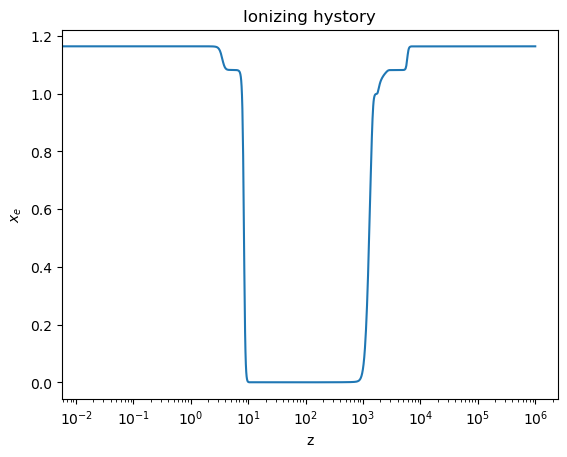

In [44]:
plt.plot(z, background['x_e'])
plt.xlabel('z')
plt.ylabel('$x_e$')
# riga verticale, unisci grafici
plt.title('Ionizing hystory')
plt.xscale('log')
#plt.yscale('log')


Tre free electron fraction starts over 1 since we defined it with H atoms, while this jump is given by the He fraction present.
The first bump and jump indicates the rehionization epoch (the explosions of first stars in the Universe free again the electrons, making again the Universe optically thick).
The second bumb indicates, approximately, the ricombination epoch, with the different transition given by the broken lines and jumps.

In [45]:
# I can change parameters, here changing tau
pars1 = camb.set_params(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.01,  
                       As=2e-9, ns=0.965, halofit_version='mead', lmax=3000)

#calculate results for these parameters
results  = camb.get_results(pars)
results1 = camb.get_results(pars1)

background1 = results1.get_background_redshift_evolution(z)



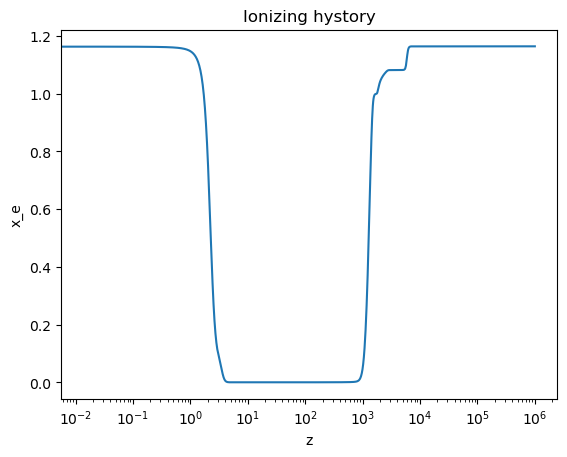

In [46]:
plt.plot(z, background1['x_e'])
plt.xlabel('z')
plt.ylabel('x_e')
plt.title('Ionizing hystory')
plt.xscale('log')
#plt.yscale('log')


In [47]:
# CAMB also compute the derived parameters, some of which could be useful
results.get_derived_params()
#z_star is recombination redshift

{'age': 13.740451258557629,
 'zstar': 1090.5875263840048,
 'rstar': 144.20807727355518,
 'thetastar': 1.0446246860260757,
 'DAstar': 13.804774021007146,
 'zdrag': 1059.2313618034489,
 'rdrag': 146.9871966667074,
 'kd': 0.14067153358370493,
 'thetad': 0.16177609526590137,
 'zeq': 3441.8515054149993,
 'keq': 0.010503792217322724,
 'thetaeq': 0.8079811517477885,
 'thetarseq': 0.4469751333084916}

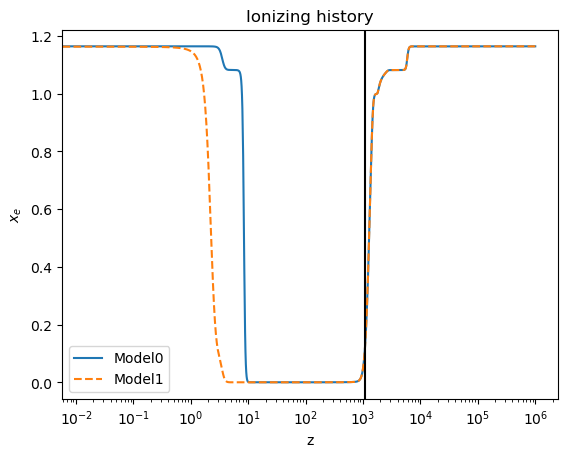

In [48]:
# Comparing graphs again
plt.plot(z, background['x_e'], label='Model0')
plt.plot(z, background1['x_e'], ls='--', label='Model1')
plt.axvline(results.get_derived_params()['zstar'], color='k') # vertical line for x_e 90% ionized
plt.legend()
plt.xlabel('z')
plt.ylabel('$x_e$')
plt.title('Ionizing history')
plt.xscale('log')

Diminushing tau, the optical thickness of the Universe diminushes and the Universe remains transparent to radiation further in the past, making rehionization happening in Model1 far more in the past then for Model0.

In [49]:
background.keys() # gives the access keys

dict_keys(['x_e', 'opacity', 'visibility', 'cs2b', 'T_b', 'dopacity', 'ddopacity', 'dvisibility', 'ddvisibility'])

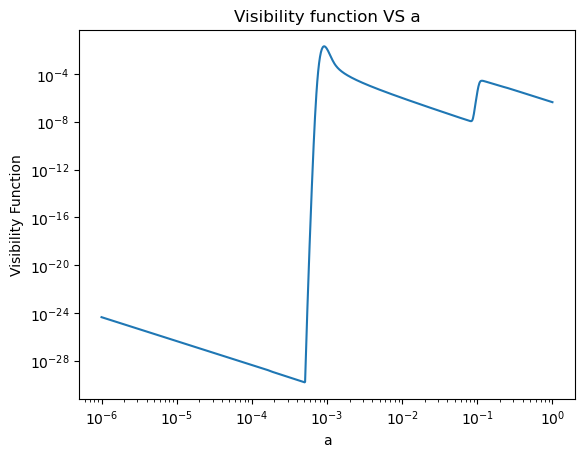

In [50]:
plt.plot(a, background['visibility'])
plt.xlabel('a')
plt.ylabel('Visibility Function')
plt.title('Visibility function VS a')
plt.xscale('log')
plt.yscale('log')

The visibility function practically is the derivative of the optical depth and it has two peaks: the first one at recombination, the second at reionization.

**Perturbations:**

Si devono risolvere E+BOLTZ accoppiate, a mano infinito!!

In [51]:
a = np.logspace(-6, 0, 1000) #grid spaced in log
z = 1./a - 1.
_vars = ['k/h', 'a', 'H', 'delta_cdm', 'delta_photon', 'delta_neutrino','Weyl']
_k=0.1 # first argument of _time_evolution
_time_evolution = results.get_redshift_evolution(_k, z, vars=_vars)#primo valore è k modo Fourier, Weyl è potenziale di weyl i.e. phi+psi

We want to understand what happens to perturbation SUB and SUPER horizon. We then need to understand when the mode enters the horizon.

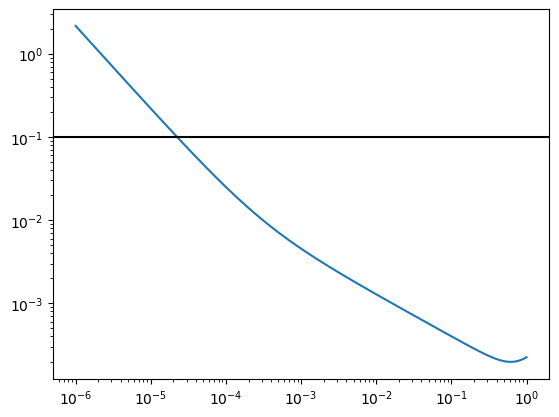

In [52]:
#find mode enters horizon
plt.plot(a, _time_evolution[:, _vars.index('H')])# H in conformal time
plt.axhline(_k, color='k')
plt.xscale('log')
plt.yscale('log')
#_time_evolution[:, _vars.index('a')]*_time_evolution[:, _vars.index('H')] -_k 
# with rootfinding gives the exact solution


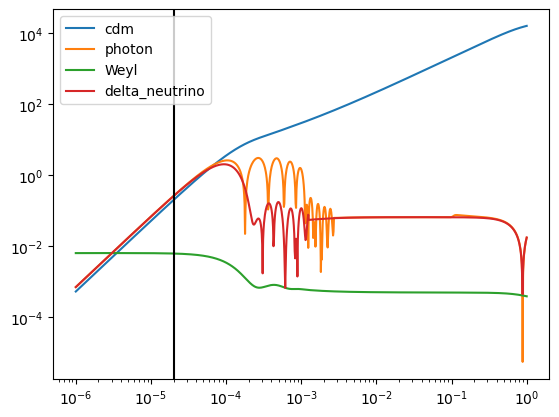

In [53]:
plt.plot(a, np.abs(_time_evolution[:, _vars.index('delta_cdm')]), label='cdm')
plt.plot(a, np.abs(_time_evolution[:, _vars.index('delta_photon')]), label='photon')
plt.plot(a, np.abs(_time_evolution[:, _vars.index('Weyl')]), label='Weyl')
plt.plot(a, np.abs(_time_evolution[:, _vars.index('delta_neutrino')]), label='delta_neutrino')
plt.axvline(2.e-5, color='k') #horizon entry ad occhio
plt.legend()
plt.xscale('log')
plt.yscale('log')

You can see the information treated in Cosmic Structure lessons:
- when the mode is super horizon, the grav. potential (Weyl) is constant, while it decays at horizon entry
- cdm and photon densities increase before horizon entry, then cdm continues growing, photon densities starts oscillating.
- neutrinos act as photons.

Note that cdm grothw super horizon evolves differently from what we have found since CAMB works in sincronups gauge, while we warked in newtonian gauge.

**Gauge changement:**

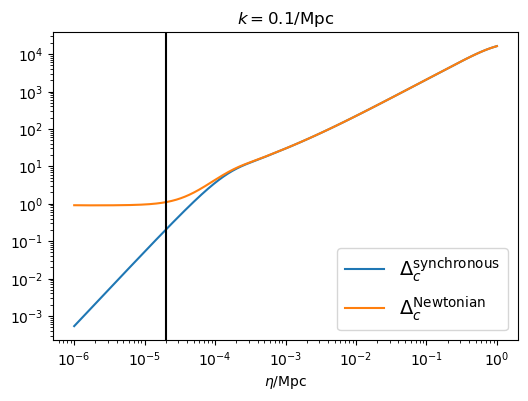

In [54]:
#It's also possible to plot quantities in other gauges, or arbitrary symbolic expressions,
#using camb.symbolic.
#For example, this plots the Newtonian gauge density compared to the synchronous gauge one
import camb.symbolic as cs
#The following line creates a symbolic object:
Delta_c_N = cs.make_frame_invariant(cs.Delta_c, 'Newtonian') #passa da Delta_c in sincronuos gauge (CAMB default) in newtnotian gauge
ev = results.get_redshift_evolution(_k, z, vars=['delta_cdm', Delta_c_N])
plt.figure(figsize=(6,4))
plt.loglog(a, ev[:,0])
plt.loglog(a, ev[:,1])
plt.axvline(2.e-5, color='k')
plt.title(r'$k= %s/\rm{Mpc}$'%_k)
plt.xlabel(r'$\eta/\rm{Mpc}$');
plt.legend([r'$\Delta_c^{\rm synchronous}$', r'$\Delta_c^{\rm Newtonian}$'], fontsize=14);

In [55]:
cs.Delta_c

Delta_c(t)

In [56]:
type(cs.Delta_c) # per inspezione oggetto
# altri metodi per inspezione:
cs.Delta_c.__dict__#vedo cosa contiene questo oggetto: restituisce come dizionario
# i suoi argmomenti

{'nargs': Naturals0}

**Power Spectra:**

In [57]:
#Computation of matter power spectrum at given redshifts up to kmax in Mpc^{-1}, then when getting the final results you get k*h
pars.set_matter_power(redshifts=[1.e6, 1.e4, 4., 0.], kmax=10.0) # to avoid being resorted, redshift must be put from earliest
pars.NonLinear=0 # non voglio correzioni non lineari
results = camb.get_results(pars)
kh, z, pk = results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)

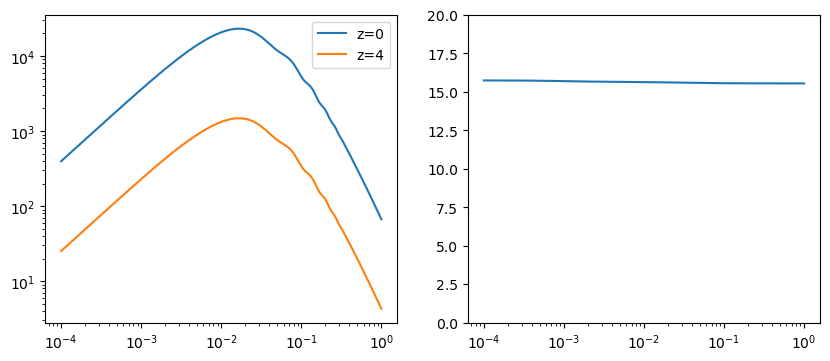

In [58]:
fig, ax = plt.subplots(1,2,figsize=(10,4))
ax[0].plot(kh, pk[0], label='z=0') #matter power spectrum at z=0, with wiggles, i.e. bao
#features seen at lesson: power law super horizon at mat-rad equality
#peak in mat-rad equality, after logarithmic behavior with bao.
ax[0].plot(kh, pk[1], label='z=4')
ax[1].plot(kh, pk[0]/pk[1])# it shows the scale indipendece of the ratio
ax[0].legend()
for _ax in ax:
    _ax.set_xscale('log')
ax[1].set_ylim([0,20])
ax[0].set_yscale('log')

In [59]:
#********************************************************#
# from matter power spectrum to correlation function, 
# tranform that in a correlation function via integration
#********************************************************#

Let's now compare it with the power spectrum in deap radiation domination:

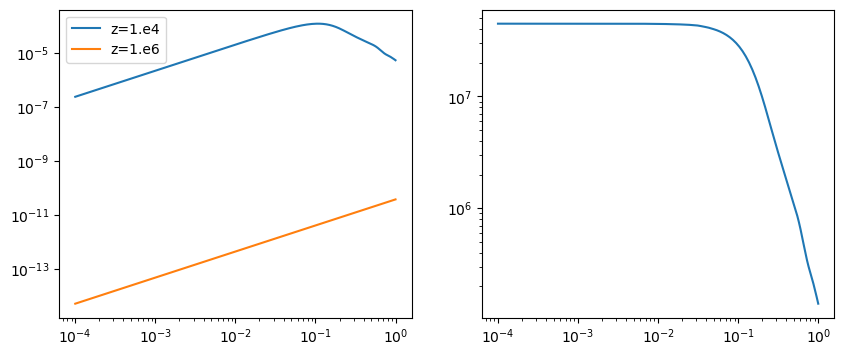

In [60]:
fig, ax = plt.subplots(1,2,figsize=(10,4))
ax[0].plot(kh, pk[2], label='z=1.e4') #some modes entered the horizon and are dumped
ax[0].plot(kh, pk[3], label='z=1.e6') #all k values above the horizon
ax[1].plot(kh, pk[2]/pk[3])
ax[0].legend()
for _ax in ax:
    _ax.set_xscale('log')
    _ax.set_yscale('log')


In [61]:
z, results.get_sigma8() # sta vedendo sigma8 non con z così ma con quelli ordinati da me 

([0.0, 4.0, 10000.0, 1000000.0],
 array([1.05646453e-07, 1.49578482e-04, 2.03698981e-01, 8.03156288e-01]))

In [62]:
[1.e6, 1.e4, 4., 0.], results.get_sigma8() # mi accorgo errore dalla fisica:
# vedo sigma8 crescente e so che deve crescere più redshift a me vicino

([1000000.0, 10000.0, 4.0, 0.0],
 array([1.05646453e-07, 1.49578482e-04, 2.03698981e-01, 8.03156288e-01]))

**CMB transfer functions:**

In [63]:
#CMB transfer functions
#pars.set_accuracy(AccuracyBoost=2) #higher accuracy, so higher sampling density
#results = camb.get_results(pars)
transfer = results.get_cmb_transfer_data()

In [64]:
transfer.__dict__
# ci dice 3 sorgenti: temperature e le 2 polarizzazioni del CMB
# q array dei k modes (detti q e non k quando non è assunta la piattezza)
# L dà i modi di Lagrange di cui si stanno calcolando le transfer functions, 
# quasi tutte a calcolate a scale grandi, meno a piccole scale 
# in fine, le transfer functions 

{'NumSources': 3,
 'q': array([7.10009756e-06, 7.84575859e-06, 8.66972988e-06, ...,
        4.84581658e-01, 5.21857171e-01, 5.59132683e-01]),
 'L': array([   2,    3,    4,    5,    6,    7,    8,    9,   10,   11,   12,
          13,   14,   15,   17,   19,   21,   23,   25,   27,   29,   31,
          33,   35,   37,   40,   45,   50,   55,   60,   65,   70,   75,
          80,   85,   90,  110,  130,  150,  175,  200,  250,  300,  350,
         400,  450,  500,  550,  600,  650,  700,  750,  800,  850,  900,
         950, 1000, 1050, 1100, 1150, 1200, 1250, 1300, 1350, 1400, 1450,
        1500, 1550, 1600, 1650, 1700, 1750, 1800, 1850, 1900, 1950, 2000,
        2050, 2100, 2150, 2200, 2250, 2300, 2350, 2400, 2450, 2500, 2550,
        2600, 2650, 2700, 2750, 2800, 2850, 2900, 2950, 3000, 3050, 3100,
        3150], dtype=int32),
 'delta_p_l_k': array([[[-1.29126094e-04, -1.57658420e-04, -1.92484515e-04, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 8.13

In [65]:
# Conto per il quadrupolo

#Chiedo quale sia l'indice del multipolo 2
list(transfer.L).index(2)

0

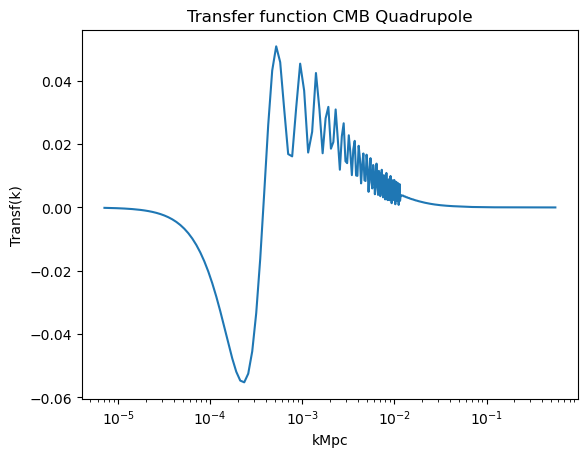

In [66]:
ell = 2
idx = list(transfer.L).index(ell)
# Plot
plt.plot(transfer.q, transfer.delta_p_l_k[0, idx, :])
plt.ylabel('Transf(k)')
plt.xlabel('kMpc')
plt.xscale('log')
plt.title('Transfer function CMB Quadrupole')
plt.show()

In [67]:
# Indice 0 in transfer.delta_p_l_k[0, idx, :]
transfer.delta_p_l_k.shape, transfer.q.shape
# numero di sorgenti, numero di multipoli l che calcola, quanti valori di k ho
# in transfer.q.shape ho solo il numero di valori di k

((3, 100, 3430), (3430,))

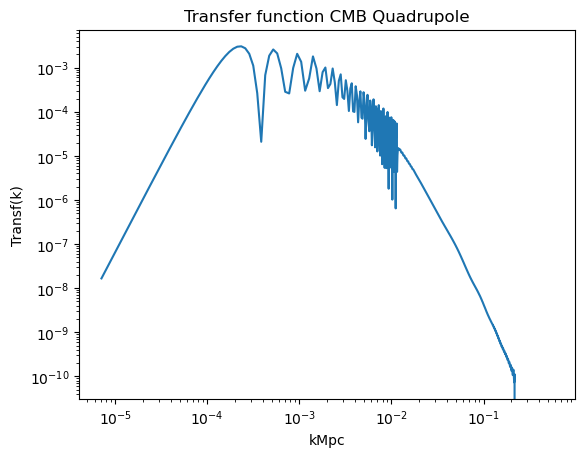

In [68]:
 # Il valore del quadrupolo è il quadrato della precedente integrato against il primordial power spectrum
# Plot
plt.plot(transfer.q, transfer.delta_p_l_k[0, idx, :]**2)
plt.ylabel('Transf(k)')
plt.xlabel('kMpc')
plt.xscale('log')
plt.yscale('log')
plt.title('Transfer function CMB Quadrupole')
plt.show()

Oscillazioni in alto sono non risolte da griglia in q di CAMB; allora poi CAMB approssima le Bessel functions con la loro media.

In [69]:
powers = results.get_cmb_power_spectra(pars, CMB_unit='muK') #calcolare cmb power spectra

In [70]:
powers.keys()
#c'è power spectrum totale, senza effetto lensing, totale senza lensing (i.e.con modi tensoriali e scalari),
# solo lensato da modi scalari, solo dovuto ai modi tensoriali

dict_keys(['total', 'unlensed_scalar', 'unlensed_total', 'lensed_scalar', 'tensor', 'lens_potential'])

In [71]:
#va definito ls, perchè devo andare a recuperare i valori di l
ls=np.arange(powers['total'].shape[0])
ls

array([   0,    1,    2, ..., 3048, 3049, 3050])

In [72]:
powers['total']
#Monopolo e dipolo sono sempre 0 perchè non li sta calcolando

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 9.71251487e+02,  3.19837770e-02,  1.56687832e-06,
         2.60296179e+00],
       ...,
       [ 2.23478049e+01,  7.23177510e-01,  1.17463247e-02,
        -1.14575231e+00],
       [ 2.22948136e+01,  7.21317038e-01,  1.17310550e-02,
        -1.13913907e+00],
       [ 2.22417200e+01,  7.19492060e-01,  1.17158002e-02,
        -1.13258783e+00]])

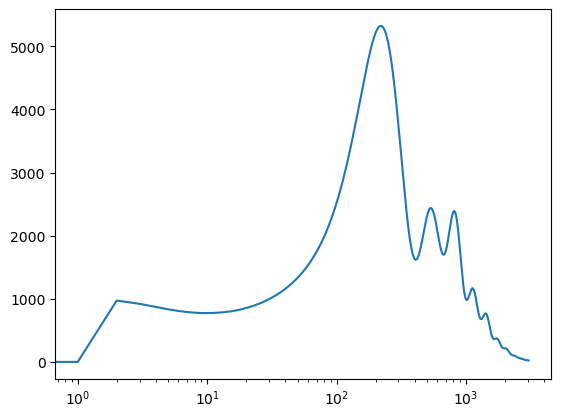

In [73]:
plt.plot(ls, powers['total'][:, 0])
plt.xscale('log')
# quel primo gradino è perchè stiamo plottando anche 0 e 1 che non calcola

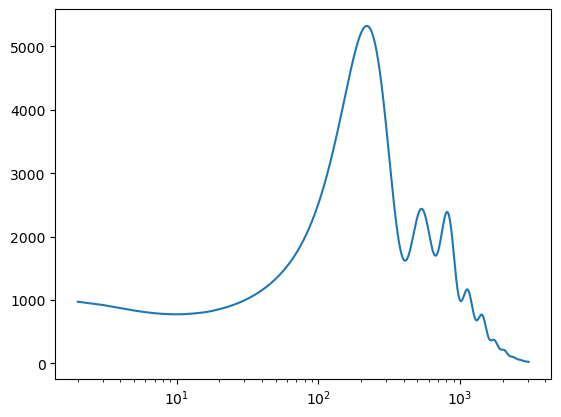

In [74]:
# GLi si dice di partire da 2
plt.plot(ls[2:], powers['total'][2:, 0])
plt.xscale('log')
# quel primo gradino è perchè stiamo plottando anche 0 e 1 che non calcola

**New physics search DESI:**

In [75]:
#Come testare nuova fisica dalle osservabli cosmologiche

In [76]:
#e.g. use the PPF model, modulo per la DE di CAMB
from camb.dark_energy import DarkEnergyPPF, DarkEnergyFluid

w0 = - 0.7

wa = -1.0

# Reference Parameters
# set up parameters:
# setting up my fiducial cosmology 
pars = camb.set_params(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06,  
                       As=2e-9, ns=0.965, halofit_version='mead', lmax=3000)

# I can change parameters, here changing K
pars3 = camb.set_params(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0.1, tau=0.06,  
                       As=2e-9, ns=0.965, halofit_version='mead', lmax=3000)

pars3.DarkEnergy = DarkEnergyPPF(w=w0, wa=wa) #DE energy evolving tra i 2 valori di w
#pars.DarkEnergy = DarkEnergyPPF(w=-1.2, wa=0.2)
#print('w, wa model parameters:\n\n', pars.DarkEnergy)
results = camb.get_results(pars)
results3 = camb.get_results(pars3)

Si è solo cambiato w DE mentre resto tutto tenuto fisso; non la cosa migliore del mondo perchè quando si procede con il fit, vi sono sicuramente compensazioni come si vede nel paper di DESI.

Text(0.5, 0, 'z')

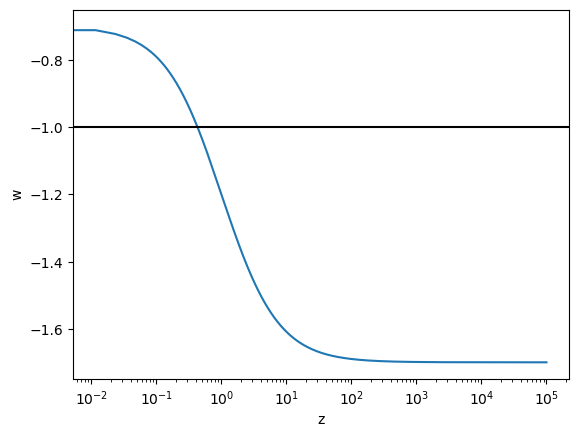

In [77]:

a = np.logspace(-5,0,1000)
z= 1./a - 1.
w = w0 + wa*(1-a)

plt.plot(z, w)
plt.axhline(-1, color = 'k') #modello Lambda CDM
plt.xscale('log')
plt.ylabel('w')
plt.xlabel('z')

A basso redshift, w<-1, ovvero l'energia oscura si sta diluendo più lentamente, w>-1 diminuisce più veloce. Sta diminuendo andando nel passato, mentre le densità tendenzialmente aumentano.

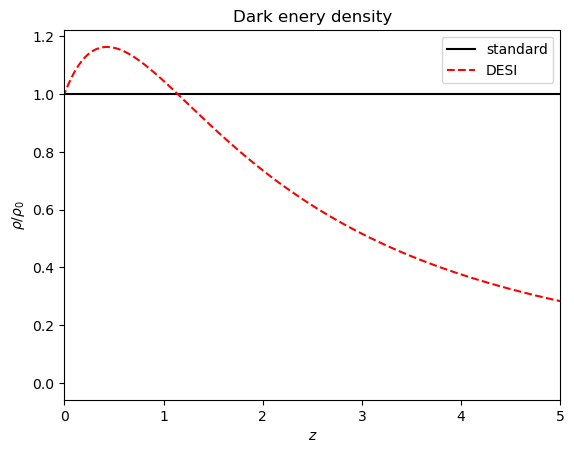

In [78]:
# Verifica andamento densità nel passato con i metodi di CAMB
rho, _ = results.get_dark_energy_rho_w(a)
rho2, _ = results3.get_dark_energy_rho_w(a)
plt.plot(z, rho, color='k', label = 'standard')
plt.plot(z, rho2, color='r', ls='--', label = 'DESI')
plt.legend()
plt.ylabel(r'$\rho/\rho_0$')
plt.xlabel('$z$')
plt.xlim(0,5)
plt.title('Dark enery density');

Più a redshift intermedi, andandando nel passato la rho si diluisce; la densità aumenta durante l'evoluzione.
Per z tra 0.5 e 1 ho maggior impatto perchè l'enrgia oscura diviene rilevante mentr enel passato comunque non lo era, anche se DE cambia molto è irrilevante.

In [79]:
#Cosa succede al matter power spectrum?
for _p in [pars, pars3]:
    _p.set_matter_power(redshifts=[0., 0.5, 1., 1.5, 1000], kmax=10.0) # to avoid being resorted, redshift must be put from earliest
    _p.NonLinear=0 

#pars.NonLinear=0 # non voglio correzioni non lineari
results = camb.get_results(pars)
results3 = camb.get_results(pars3)
kh, z, pk = results.get_matter_power_spectrum(minkh=1e-3, maxkh=1, npoints = 200)
kh3, z3, pk3 = results3.get_matter_power_spectrum(minkh=1e-3, maxkh=1, npoints = 200)

Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)


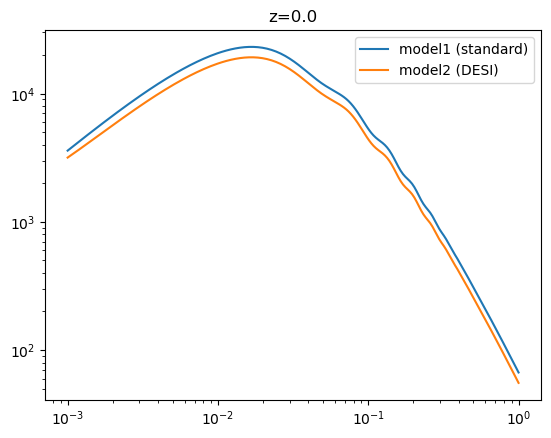

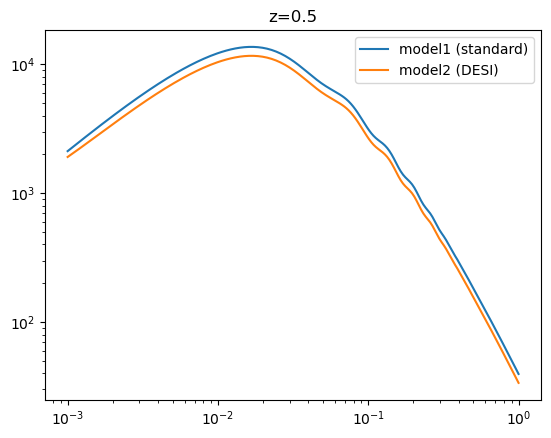

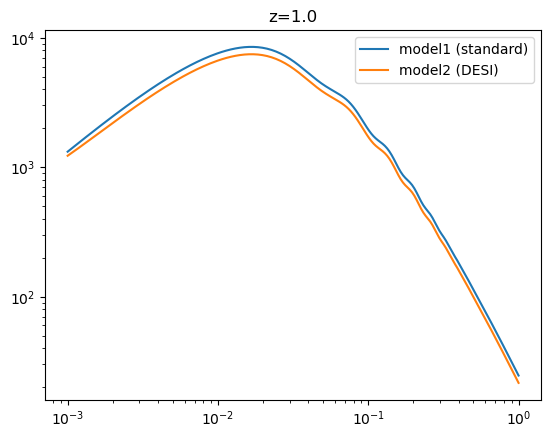

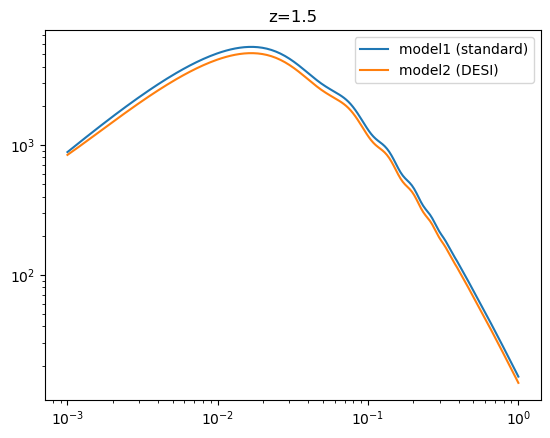

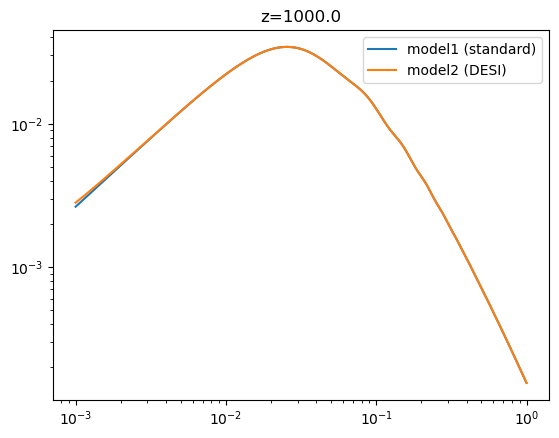

In [80]:
for _i in range(len(z)):
    plt.plot(kh, pk[_i], label='model1 (standard)')
    plt.plot(kh3, pk3[_i], label='model2 (DESI)')
    plt.title('z=%s'%z[_i])
    plt.legend()
    plt.xscale('log')
    plt.yscale('log')
    plt.show()
    
    plt.close('all')

Presenza energia oscura ha aumentato groth rate strutture, energia oscura a bassi redshift si comporta quindi più similmente a materia rispetto costante cosmologica e la materia cresce; sto aumentando clustering delle strutture (espansione Uni più lenta).

Penultimo papaer desi per correlation function definition.